In [19]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)
import squarify
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [20]:
online = pd.read_csv('data2.csv', encoding='ISO-8859-1')
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

In [21]:
print(online.isnull().sum())
online = online.dropna()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [22]:
online.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [33]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)
#online['CohortMonth'] = group1.trans
#online

online['CohortMonth'] = online.groupby(['CustomerID'])["InvoiceMonth"].transform('min')
print(online.describe())

            Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [34]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

inv_year, inv_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')


years_diff = inv_year - cohort_year
months_diff = inv_month - cohort_month

online['CohortIndex'] = (years_diff*12) + months_diff + 1
online.head(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01,2010-12-01,1
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [45]:
#monthly active users for each cohort


cohort_data = online.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
#retention rate

cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size, axis=0)
retention = retention.round(3)
retention.index = retention.index.strftime('%m-%Y')
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
12-2010,1.0,0.382,0.334,0.387,0.360,0.397,0.380,0.354,0.354,0.395,0.373,0.50,0.274
01-2011,1.0,0.240,0.283,0.242,0.328,0.299,0.261,0.257,0.311,0.347,0.368,0.15,NaN
02-2011,1.0,0.247,0.192,0.279,0.268,0.247,0.255,0.282,0.258,0.313,0.092,NaN,NaN
03-2011,1.0,0.191,0.255,0.218,0.232,0.177,0.264,0.239,0.289,0.089,NaN,NaN,NaN
04-2011,1.0,0.227,0.221,0.211,0.207,0.237,0.231,0.261,0.084,NaN,NaN,NaN,NaN
05-2011,1.0,0.237,0.172,0.172,0.215,0.244,0.265,0.104,NaN,NaN,NaN,NaN,NaN
06-2011,1.0,0.209,0.187,0.272,0.247,0.336,0.102,NaN,NaN,NaN,NaN,NaN,NaN
07-2011,1.0,0.209,0.204,0.230,0.272,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08-2011,1.0,0.251,0.251,0.251,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09-2011,1.0,0.299,0.326,0.121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# calculating average quantity

cohort_qty = online.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean().reset_index()
avg_qty = cohort_qty.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
avg_qty.index = avg_qty.index.strftime('%m-%Y')

# calculating average price

cohort_price = online.groupby(['CohortMonth', 'CohortIndex'])['UnitPrice'].mean().reset_index()
avg_price = cohort_price.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
avg_price.index = avg_price.index.strftime('%m-%Y')



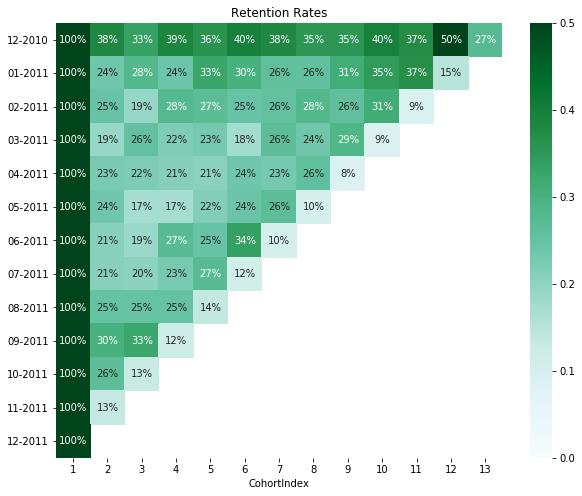

In [85]:
plt.figure(figsize=(10,8))
plt.title("Retention Rates")
sns.heatmap(data= retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='BuGn')
plt.show()

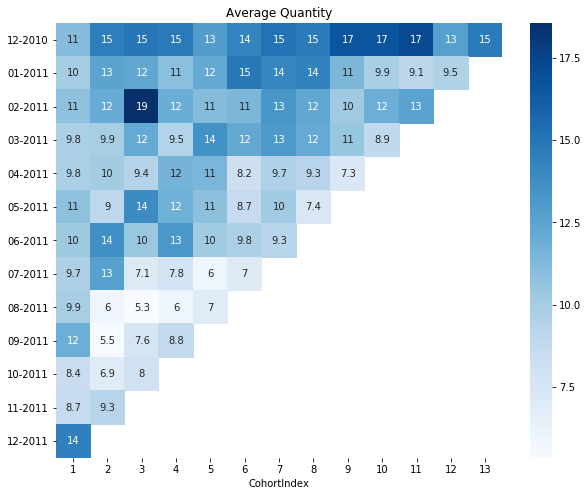

In [86]:
plt.figure(figsize=(10,8))
plt.title("Average Quantity")
sns.heatmap(data= avg_qty, annot=True, cmap='Blues')
plt.show()

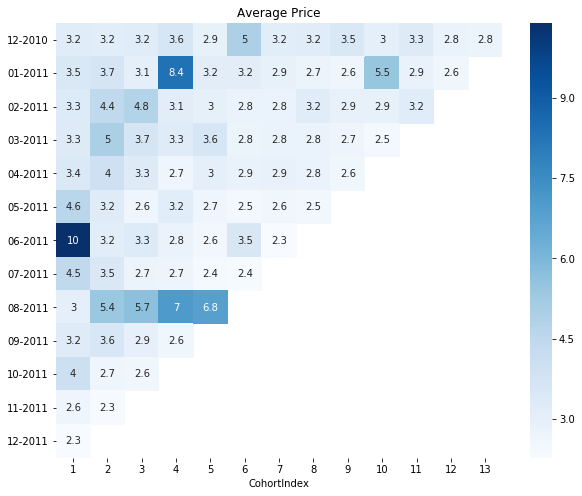

In [87]:
plt.figure(figsize=(10,8))
plt.title("Average Price")
sns.heatmap(data= avg_price, annot=True, cmap='Blues')
plt.show()




In [163]:
online['TotalSum'] = online['Quantity']*online['UnitPrice']

snapshot_date = online['InvoiceDate'].max() + dt.timedelta(days=1)

print(snapshot_date)

data_process = online.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'
})

data_process.rename(columns={'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

print(data_process.head(7))

2011-12-10 12:50:00
            Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0         326          2           0.00
12347.0           2        182        4310.00
12348.0          75         31        1797.24
12349.0          19         73        1757.55
12350.0         310         17         334.40
12352.0          36         95        1545.41
12353.0         204          4          89.00


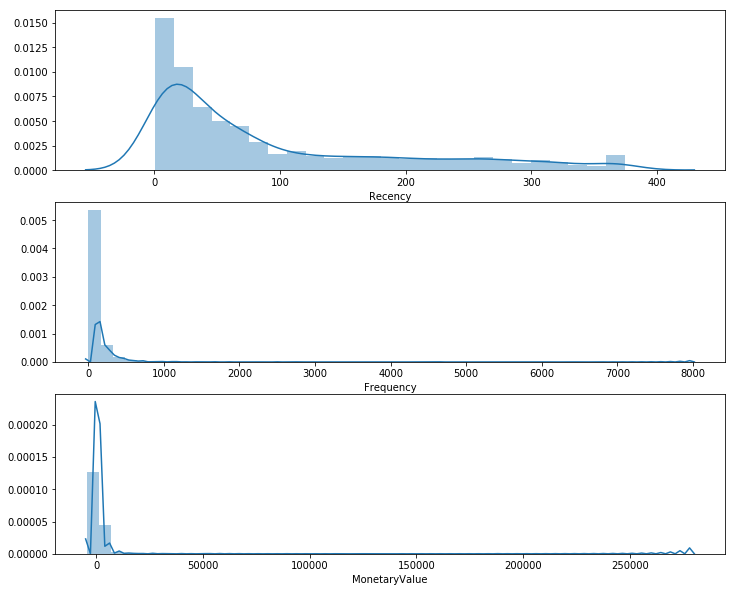

In [164]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])
# Show the plot
plt.show()

In [165]:
# --Calculate R and F groups--
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_process['Frequency'], q=4, labels=f_labels)
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_process['MonetaryValue'], q=4, labels=m_labels)
# Create new columns R, M and F 
data_process = data_process.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): 
    return str(x['R']) + str(x['F']) + str(x['M'])
data_process['RFM_Segment_Concat'] = data_process.apply(join_rfm, axis=1)
data_process.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,111
12347.0,2,182,4310.00,4,4,4,444
12348.0,75,31,1797.24,2,2,4,224
12349.0,19,73,1757.55,3,3,4,334
12350.0,310,17,334.40,1,1,2,112


In [166]:
# Calculate RFM_Score
data_process['RFM_Score'] = data_process[['R','F','M']].sum(axis=1)
data_process.head(5)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3.0
12347.0,2,182,4310.00,4,4,4,444,12.0
12348.0,75,31,1797.24,2,2,4,224,8.0
12349.0,19,73,1757.55,3,3,4,334,10.0
12350.0,310,17,334.40,1,1,2,112,4.0


In [167]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
data_process['RFM_Level'] = data_process.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
data_process.head(5)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3.0,Require Activation
12347.0,2,182,4310.00,4,4,4,444,12.0,Can't Loose Them
12348.0,75,31,1797.24,2,2,4,224,8.0,Champions
12349.0,19,73,1757.55,3,3,4,334,10.0,Can't Loose Them
12350.0,310,17,334.40,1,1,2,112,4.0,Needs Attention


In [102]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = data_process.groupby('RFM_Level').agg({
    'Recency': ['mean','median'],
    'Frequency': ['mean','median'],
    'MonetaryValue': ['mean', 'median', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency        Frequency        MonetaryValue              
                      mean median      mean median          mean  median count
RFM_Level                                                                     
Can't Loose Them      25.2     16     195.1    124        4130.3  1981.4  1690
Champions             62.7     50      57.0     49         974.7   775.1   467
Loyal                 78.8     55      39.7     34         724.2   598.2   447
Needs Attention      174.5    157      13.9     12         227.1   216.2   391
Potential             94.3     67      28.5     25         491.8   381.5   468
Promising            153.0    148      21.2     19         346.8   322.4   517
Require Activation   264.8    265       7.8      8         109.1   135.9   392


In [103]:
rfm_level_agg.columns.droplevel()

Index(['mean', 'median', 'mean', 'median', 'mean', 'median', 'count'], dtype='object')

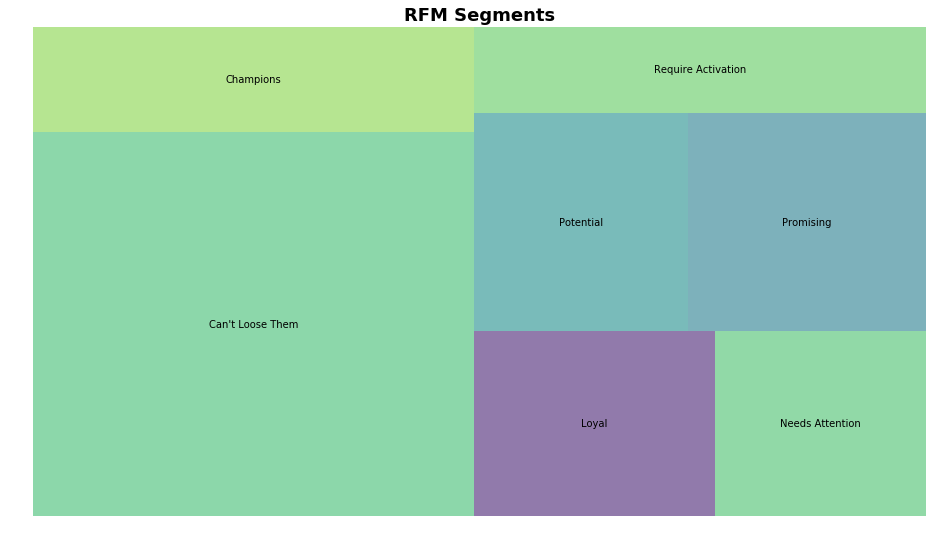

In [108]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','RecencyMedian','FrequencyMean','FrequencyMedian',
                         'MonetaryMean','MonetaryMedian','Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

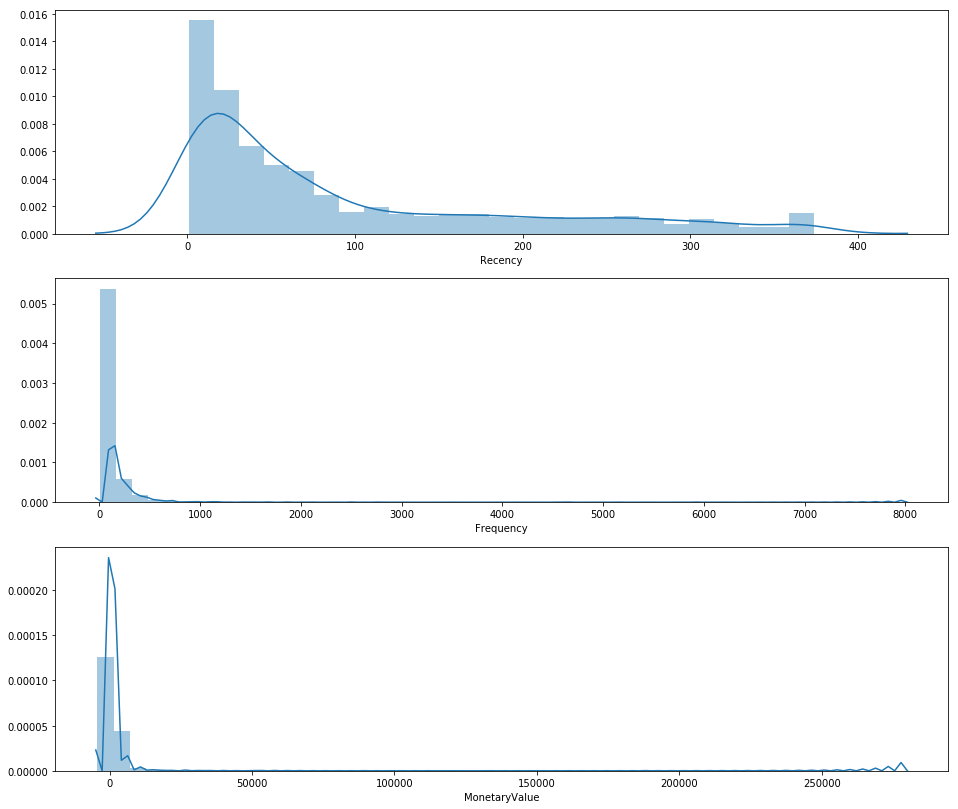

In [114]:
# Plot RFM distributions
plt.figure(figsize=(16,14))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])
# Show the plot
plt.show()

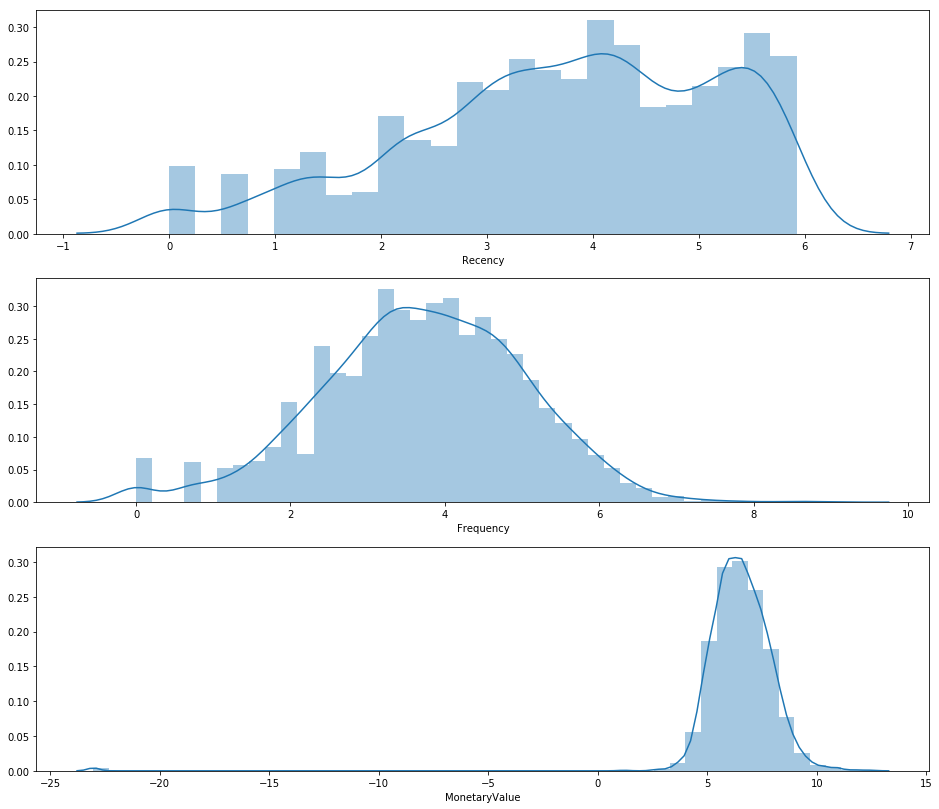

In [168]:
#we will do a log transformation
data_process = data_process[data_process['MonetaryValue'] >= 0]
# Apply Log Transformation
data_process['MonetaryValue'] = data_process['MonetaryValue'] + 0.0000000001
recency_log = np.log(data_process['Recency'])
frequency_log = np.log(data_process['Frequency'])
monetary_log = np.log(data_process['MonetaryValue'])
# Plot RFM distributions
plt.figure(figsize=(16,14))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(recency_log)
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(frequency_log)
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(monetary_log)
# Show the plot
plt.show()

In [170]:
data_process_log = pd.DataFrame()
data_process_log['r'] = recency_log
data_process_log['f'] = frequency_log
data_process_log['m'] = monetary_log

scaler = StandardScaler()
scaler.fit(data_process_log)
data_process_norm = scaler.transform(data_process_log)
data_process_norm_df = pd.DataFrame(data_process_norm)
data_process_norm_df.describe().round(2)

,0,1,2
count,4329.00,4329.00,4329.00
mean,-0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-2.54,-2.82,-14.81
25%,-0.60,-0.62,-0.39
50%,0.13,0.02,-0.00
75%,0.83,0.69,0.45
max,1.51,4.01,3.04


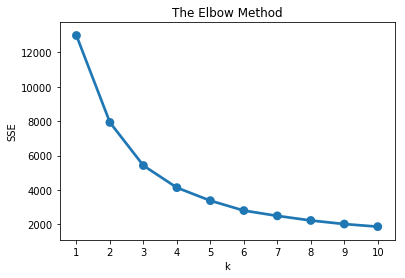

In [172]:
# Fit KMeans and calculate SSE for each *k*

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_process_norm)
    sse[k] = kmeans.inertia_
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [174]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(data_process_norm)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_k4 = data_process.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_k4.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          72.0      71.0        1163.0  1805
1          10.0     242.0        5421.0  1061
2          85.0      28.0           0.0    12
3         172.0      14.0         319.0  1451